In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

import pandas as pd
import numpy as np

from main import NER

In [50]:
ifile = "data/conll2003.test.conll"
ofile = "out/lstm2.txt"

ner = NER()

_, gold_labels = ner.extract_features_and_labels(ifile, simple=True)
features, out_labels = ner.extract_features_and_labels(ofile, simple=True)

tokens = [f['token'] for f in features]

df = pd.DataFrame({'token': tokens,'gold': gold_labels, 'predicted': out_labels})
# df.drop(df[df['gold'] == 'O'].index, inplace=True)

df = df.replace({'I-ORG': 'ORG', 
                 'B-ORG': 'ORG',
                 'I-PER': 'PER',
                 'B-PER': 'PER',
                 'I-LOC': 'LOC',
                 'B-LOC': 'LOC',
                 'I-MISC': 'MISC',
                 'B-MISC': 'MISC'})

print("sample of NER predictions")
df.drop(df[df['gold'] == 'O'].index).sample(10)

sample of NER predictions


,token,gold,predicted
13772,Pork,ORG,O
21662,YIT,ORG,ORG
21285,BEIJING,LOC,LOC
13592,NATS,ORG,ORG
37725,Gladishiva,PER,PER
28157,Point,LOC,ORG
40881,Davies,PER,PER
6695,Stuttgart,ORG,ORG
28161,Kaohsiung,LOC,LOC
40542,Efan,PER,PER


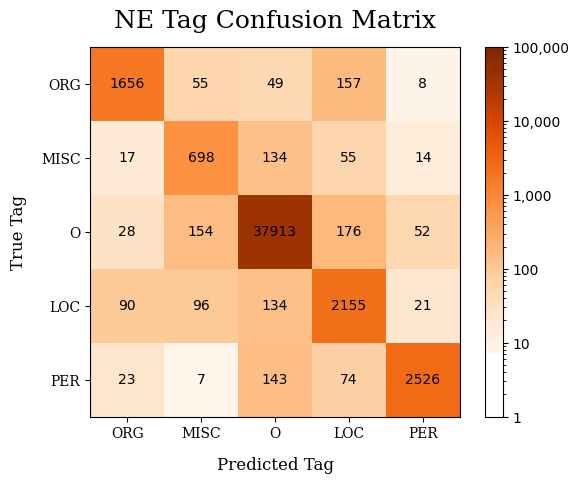

In [51]:
conf = confusion_matrix(df['gold'], df['predicted'])
labels = ["ORG", "MISC", "O", "LOC", "PER"]

fig, ax = plt.subplots()
a = ax.matshow(conf, cmap="Oranges", norm=colors.LogNorm(vmax=100000))
cbar = fig.colorbar(a,  ticks=np.arange(0,5))
cbar.set_ticks([1, 10, 100, 1000, 10000, 100000])
cbar.set_ticklabels(['1', '10', '100', '1,000', '10,000', '100,000'])

for i in range(5):
    for j in range(5):
        c = conf[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

ax.xaxis.set_ticks_position('bottom')
plt.xticks(range(0,5), labels, fontsize=10, fontname="serif")
plt.yticks(range(0,5), labels, fontsize=10, fontname="serif")
plt.xlabel('Predicted Tag', labelpad=12, fontdict={'fontsize': 12, "family": "serif"})
plt.ylabel('True Tag', labelpad=10, fontdict={'fontsize': 12, "family": "serif"})
plt.title('NE Tag Confusion Matrix', pad=14, fontdict={'fontsize': 18, "family": "serif"})
plt.show()

In [52]:
def eval_predictions(gold, predicted, labels):
    """Evaluates the predictions against the gold labels."""
    
    # Calculate the precision, recall and F1 score for each label
    recall = recall_score(gold, predicted, average=None)
    precision = precision_score(gold, predicted, average=None)
    f1 = f1_score(gold, predicted, average=None)

    # Create a dataframe with the scores
    scores = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1': f1}, index=labels)
    scores.index.name = 'Label'
    scores.loc['AVERAGE'] = scores.mean()
    
    return scores

eval_predictions(df['gold'], df['predicted'], labels)

,Precision,Recall,F1
Label,,,
ORG,0.912900,0.860260,0.885798
MISC,0.691089,0.760349,0.724066
O,0.988012,0.989301,0.988657
LOC,0.823462,0.863381,0.842949
PER,0.963754,0.910927,0.936596
AVERAGE,0.875843,0.876844,0.875613


FT

LR      0.794795	0.746766	0.765198

WV TUNED

LR      0.812446	0.775693	0.789451

W2V G300 

LR:     0.831340	0.822014	0.825762

SVM:    0.852616	0.835433	0.842793

TUNED:  0.886662    0.857275    0.870751

LSTM:   0.875843	0.876844	0.875613

## BERT eval

In [43]:
with open("out/BERTout.txt") as f:
    out_labels = f.read().split()
    _, gold_labels = ner.extract_features_and_labels(ifile, simple=True)
    df = pd.DataFrame({'gold': gold_labels, 'predicted': out_labels})
    df = df.replace({'I-ORG': 'ORG', 
                 'B-ORG': 'ORG',
                 'I-PER': 'PER',
                 'B-PER': 'PER',
                 'I-LOC': 'LOC',
                 'B-LOC': 'LOC',
                 'I-MISC': 'MISC',
                 'B-MISC': 'MISC'})
    
    print(eval_predictions(df['gold'], df['predicted'], labels))
    

         Precision    Recall        F1
Label                                 
ORG       0.875433  0.788571  0.829735
MISC      0.795380  0.525054  0.632546
O         0.992937  0.990424  0.991679
LOC       0.723556  0.893429  0.799570
PER       0.961966  0.966823  0.964388
AVERAGE   0.869854  0.832860  0.843584
